In [187]:
%pylab inline
import pandas as pd
import seaborn as sns
import scipy
import skimage

import os.path as op
import sys
path_to_script = "."
pth = op.join(path_to_script, "../../micrant/")
sys.path.insert(0, pth)
# pth = op.join(path_to_script, "../../scaffan/")
# sys.path.insert(0, pth)

import pandas as pd
import micrant

import micrant.micrant_app
import micrant.image_sort_tools as imst

sns.set_style("ticks")
from pathlib import Path
output_path_images = Path("../docs/")

# df = pd.read_excel("C:/Users/Jirik/data/medical/processed/SA_experiments.xlsx")
df = pd.read_excel("C:/Users/Jirik/data/medical/processed/scaffan2019/metacentrum/SA_experiments.xlsx")
df

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm', 'clf', 'amax']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,Annotation Color,Annotation Details,Annotation ID,Annotation Title,Area,Area unit,Branch number,Central Vein Dice,Central Vein Jaccard,Central vein area,...,Processing;Skeleton Analysis;Working Resolution,Processing;Texture Analysis;GLCM Levels,Processing;Texture Analysis;Tile Size,Processing;Texture Analysis;Tile Spacing,Processing;Texture Analysis;Working Resolution,Scaffan Version,Skeleton length,platform.node,platform.processor,platform.system
0,#00FF00,PFCVI=2 SNI=2 SWP=1 SQZ=0.4 CVM=0 IFE=0,6,NaN,0.777046,mm,22489.0,NaN,NaN,0.056655,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,45.58554,krux2.ncbr.muni.cz,NaN,Linux
1,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.8,6,NaN,1.959020,mm,8871.0,NaN,NaN,0.085619,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,18.66592,konos2.fav.zcu.cz,NaN,Linux
2,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9,1,NaN,1.562744,mm,NaN,0.108730,0.057491,0.137554,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
3,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9,2,NaN,1.031514,mm,NaN,0.072651,0.037695,0.148508,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
4,#00FF00,PFCVI=1 SNI=0 SWP=0 SQZ=0.1,6,NaN,1.184912,mm,NaN,0.035911,0.018284,0.148555,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=1.5,9,NaN,0.920082,mm,14435.0,NaN,NaN,0.074718,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,28.39382,elmo5-14.hw.elixir-czech.cz,NaN,Linux
316,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=2.0,10,NaN,0.817524,mm,15528.0,NaN,NaN,0.027523,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,29.15094,elmo5-14.hw.elixir-czech.cz,NaN,Linux
317,#0000FF,IFE=0 CVM=0 SQZ=0.1 SNI=2.0,11,NaN,1.190702,mm,15148.0,NaN,NaN,0.119581,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,26.50921,elmo5-14.hw.elixir-czech.cz,NaN,Linux
318,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=2.0,12,NaN,1.728910,mm,35651.0,NaN,NaN,0.096388,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,65.94952,elmo5-14.hw.elixir-czech.cz,NaN,Linux


In [188]:
df.keys()

Index(['Annotation Color', 'Annotation Details', 'Annotation ID',
       'Annotation Title', 'Area', 'Area unit', 'Branch number',
       'Central Vein Dice', 'Central Vein Jaccard', 'Central vein area',
       'Datetime', 'Dead ends number', 'Experiment Datetime',
       'Experiment Title', 'File Name', 'File Path', 'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var', 'Input;Data Info', 'Input;File Path', 'Job ID',
       'Lobulus Border Dice', 'Lobulus Border Jaccard',
       'Lobulus Boundary Compactness', 'Lobulus Equivalent Diameter',
       '

In [189]:
np.unique(df["Scaffan Version"])

array(['0.14.0'], dtype=object)

In [190]:
np.unique(df["Experiment Datetime"])

array(['2019-07-23 22:31:23', '2019-07-23 22:32:14',
       '2019-07-23 22:32:29', '2019-08-19 15:49:13',
       '2019-08-21 05:46:08'], dtype=object)

In [191]:

# exp_title = "first area evaluation"
exp_title = "first seg eval"
# scaffan_version = "0.14.0"
select_by_datetime = ['2019-07-23 22:31:23', '2019-07-23 22:32:14', '2019-08-19 15:49:13', '2019-08-21 05:46:08']
# select_by_datetime = ['2019-07-23 22:31:23'] #, '2019-07-23 22:32:14']

## Use Mikrant SNI update

In [192]:
mapp = micrant.micrant_app.MicrAnt()
xfn = mapp.parameters.param("Output", "Common Spreadsheet File").value()
df_micrant = pd.read_excel(xfn)

2020-04-05 18:27:58.316 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.micrant_cache.yaml
2020-04-05 18:27:58.319 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.io3d_cache.yaml
2020-04-05 18:27:58.322 | DEBUG    | io3d.datasets:join_path:304 - sample_data_pathC:\Users\Jirik\data
2020-04-05 18:27:58.323 | DEBUG    | io3d.datasets:join_path:305 - path C:\Users\Jirik\data
2020-04-05 18:27:58.328 | DEBUG    | micrant.micrant_app:__init__:84 - common_spreadsheet_file loaded as: C:/Users/Jirik/data/micrant_data.xlsx


In [193]:
def get_col_from_ann_details(df, colname):
    df[f"{colname}"] = pd.to_numeric(df["Annotation Details"].str.extract(f'{colname}=(\d*\.?\d*)')[0])
    return df
get_col_from_ann_details(df, "PFCVI")
get_col_from_ann_details(df, "SNI")
get_col_from_ann_details(df, "SWP");
get_col_from_ann_details(df, "CMP");
get_col_from_ann_details(df, "IFE");
get_col_from_ann_details(df, "SQZ");
df = df.rename(columns={'SNI':"SNI init"})
df = imst.add_parameter_column(df, df_micrant, "SNI")

df["Sum Semi-q"] = df["PFCVI"] + df["SNI"] + df["SWP"]

.\../../micrant\micrant\image_sort_tools.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Annotation Details"].str.extract(f"{colname}=" + r"(\d*\.?\d*)")[0]


## Fill missing data 

In [194]:
# fill missing sni with SNIraw 
empty_selection = df["SNI"].isna()
display(df.loc[empty_selection][["SNI","SNI init"]])
df.loc[empty_selection, "SNI"] = df.loc[empty_selection, "SNI init"]
#df["SNIraw"]
#df["SNI"]
# selection

display(df.loc[empty_selection][["SNI","SNI init"]])

,SNI,SNI init
14,NaN,1.5
17,NaN,1.5
103,NaN,1.5
106,NaN,1.5
154,NaN,2.0


,SNI,SNI init
14,1.5,1.5
17,1.5,1.5
103,1.5,1.5
106,1.5,1.5
154,2.0,2.0


In [195]:
# fill missing SNIraw with SNI
empty_selection = df["SNI init"].isna()
display(df.loc[empty_selection][["SNI","SNI init"]])
df.loc[empty_selection, "SNI init"] = df.loc[empty_selection, "SNI"]
display(df.loc[empty_selection][["SNI","SNI init"]])

,SNI,SNI init
306,1.752,NaN


,SNI,SNI init
306,1.752,1.752


## SNI and SNIraw difference

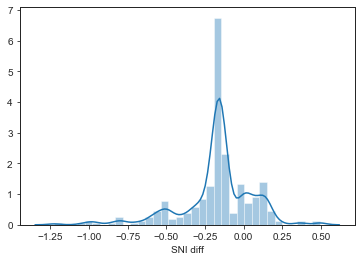

In [196]:
df["SNI diff"] = df["SNI"] - df["SNI init"]
sns.distplot(df["SNI diff"])


### SNI and SNI init maximal difference

In [197]:

mx = np.max(df["SNI"] - df["SNI init"])
print(mx)
amax = np.argmax(np.abs(df["SNI"] - df["SNI init"]))
df.loc[amax][["Annotation ID", "File Name", "SNI", "SNI init", "Annotation Color", "Annotation Details"]]

0.4945079978179361


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


Annotation ID                                                 9
File Name             PIG-005_J-18-0633_HE_PRML per decell.ndpi
SNI                                                    0.275843
SNI init                                                    1.5
Annotation Color                                        #0000FF
Annotation Details                  IFE=0 CVM=0 SQZ=0.2 SNI=1.5
Name: 315, dtype: object

In [198]:
df.keys()

Index(['Annotation Color', 'Annotation Details', 'Annotation ID',
       'Annotation Title', 'Area', 'Area unit', 'Branch number',
       'Central Vein Dice', 'Central Vein Jaccard', 'Central vein area',
       'Datetime', 'Dead ends number', 'Experiment Datetime',
       'Experiment Title', 'File Name', 'File Path', 'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var', 'Input;Data Info', 'Input;File Path', 'Job ID',
       'Lobulus Border Dice', 'Lobulus Border Jaccard',
       'Lobulus Boundary Compactness', 'Lobulus Equivalent Diameter',
       '

# Add descriptors

In [199]:
df['Dead ends number norm'] = df['Dead ends number'] / df['Lobulus Equivalent Surface']
df['Skeleton length norm'] = df['Skeleton length'] / df['Lobulus Equivalent Surface']
df['Branch number norm'] = df['Branch number'] / df['Lobulus Equivalent Surface']
df['Relative dead ends number'] = df['Dead ends number'] / df['Area']
df['Relative skeleton length'] = df['Skeleton length'] / df['Area']
df['Relative branch number'] = df['Branch number'] / df['Area']

# Add annotation

In [200]:
# Overal scaffold quality
df["OSQ"] = df.SNI * (1-df.SQZ)

# Lobulus Structure Analysis

In [201]:
dfselector =  \
(df["Experiment Title"] == exp_title) &\
(df["Experiment Datetime"].isin(select_by_datetime)) &\
(df["Annotation Details"].notnull())
# (df["Experiment Datetime"] == select_by_datetime) # &\
# (df["Scaffan Version"] == scaffan_version)
dfcor = df[dfselector
][["Branch number", "GLCM Energy", "GLCM Homogenity", "GLCM Correlation", "Skeleton length", 
            "PFCVI", 
            "SNI", 
            "SNI init", 
            "SWP", 
   "CMP",
   "Annotation Details"
#             "Sum Semi-q", 
#    "Experiment Title", "Scaffan Version"
  ]]
dfcor

,Branch number,GLCM Energy,GLCM Homogenity,GLCM Correlation,Skeleton length,PFCVI,SNI,SNI init,SWP,CMP,Annotation Details
0,22489.0,0.479750,0.760151,0.896563,45.58554,2.0,1.828936,2.0,1.0,NaN,PFCVI=2 SNI=2 SWP=1 SQZ=0.4 CVM=0 IFE=0
1,8871.0,0.747521,0.890338,0.649943,18.66592,1.0,0.160520,0.0,0.0,0.8,PFCVI=1 SNI=0 SWP=0 CMP=0.8
28,20997.0,0.489401,0.775246,0.884424,41.95737,NaN,1.730198,1.5,NaN,0.8,SNI=1.5 CMP=0.8 IFE=0 SQZ=0.4 CVM=0
29,13467.0,0.553613,0.783606,0.870150,26.14248,NaN,1.551923,1.5,NaN,0.7,SNI=1.5 CMP=0.7 IFE=0 SQZ=0.3 CVM=0
30,15370.0,0.519606,0.784930,0.874722,30.87903,NaN,1.559412,1.5,NaN,0.6,SNI=1.5 CMP=0.6 IFE=0 SQZ=0.5 CVM=0
...,...,...,...,...,...,...,...,...,...,...,...
315,14435.0,0.530189,0.790186,0.720899,28.39382,NaN,0.275843,1.5,NaN,NaN,IFE=0 CVM=0 SQZ=0.2 SNI=1.5
316,15528.0,0.491049,0.780196,0.744928,29.15094,NaN,1.763300,2.0,NaN,NaN,IFE=0 CVM=0 SQZ=0.2 SNI=2.0
317,15148.0,0.539013,0.801884,0.716112,26.50921,NaN,1.873795,2.0,NaN,NaN,IFE=0 CVM=0 SQZ=0.1 SNI=2.0
318,35651.0,0.593849,0.825416,0.749420,65.94952,NaN,1.909943,2.0,NaN,NaN,IFE=0 CVM=0 SQZ=0.2 SNI=2.0


In [202]:
features = [
    "Branch number", "Skeleton length", "Dead ends number", 
    "Branch number norm", "Skeleton length norm", "Dead ends number norm", 
    "Relative branch number", "Relative skeleton length", "Relative dead ends number", 
                                  'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var',
        'Lobulus Boundary Compactness',    
           ]

annotations = [
    "SNI","SNI init", "PFCVI", "SWP", "CMP", "IFE", "SQZ",  "OSQ",
]

## Size of dataset per annotation

In [203]:
df[dfselector][[*annotations]].describe()

,SNI,SNI init,PFCVI,SWP,CMP,IFE,SQZ,OSQ
count,293.000000,293.000000,48.000000,50.000000,102.000000,230.000000,244.000000,244.000000
mean,1.490412,1.666553,1.604167,0.900000,0.682353,0.063478,0.278689,1.153527
std,0.537766,0.548198,0.494204,0.814411,0.118916,0.205526,0.152202,0.398516
min,0.121735,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.109562
25%,1.452100,1.500000,1.000000,0.000000,0.600000,0.000000,0.200000,0.910420
50%,1.778000,2.000000,2.000000,1.000000,0.700000,0.000000,0.200000,1.129480
75%,1.846961,2.000000,2.000000,2.000000,0.800000,0.000000,0.400000,1.475290
max,2.000000,2.000000,2.000000,2.000000,0.900000,1.000000,0.800000,2.000000


## Number of files

# len(df[dfselector]['File Name'].unique())

## Correlation analysis

In [204]:
# cm = sns.light_palette("green", as_cmap=True)
# dfcor.corr('pearson').abs().style.background_gradient(cmap=cm, low=0, high=1)

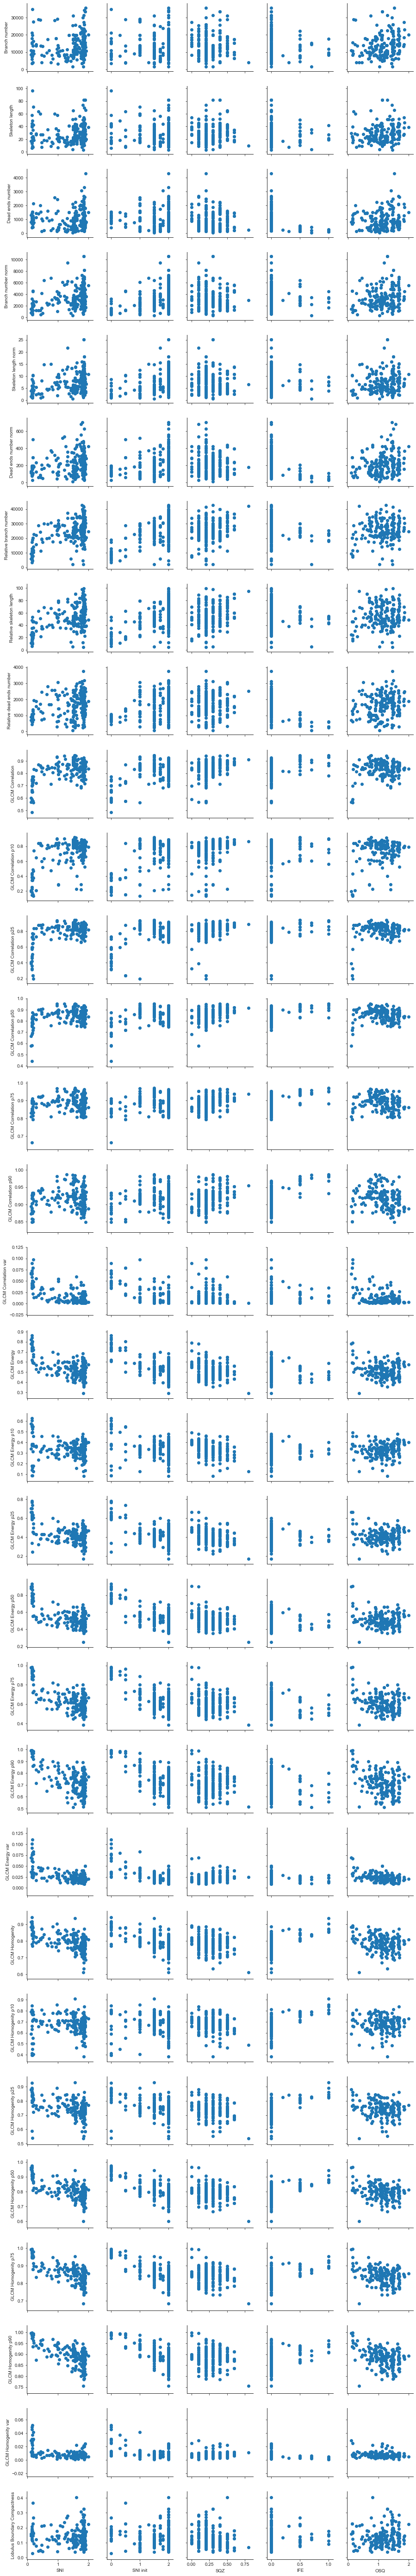

In [205]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(
    df[dfselector], y_vars=[
        *features
    ], 
    x_vars=[
#     "PFCVI", 
        "SNI", 
        "SNI init",
#         "SWP", 
        "SQZ",
#     "Sum Semi-q", 
        "IFE",
        "OSQ",
    ])
g.map(plt.scatter);

In [206]:
# ### Pearson correlation coefficient

# Absolute Pearson Correlation - usefull for linear



### Spearman correlation coefficient

Absolute Spearman Correlation 

In [432]:
# cm =sns.color_palette("coolwarm", 7, as_cmap=True)
cm = sns.light_palette("green", as_cmap=True)
# cm = sns.light_palette("green", as_cmap=True)
# dfcor.corr('spearman').abs().style.background_gradient(cmap=cm, low=0, high=1)
cor = df[dfselector][[
        *annotations,
#         "PFCVI", "SNI", "SWP", "CMP", "SQZ", "IFE", "OSQ",
        *features
]].corr('spearman').abs()[len(annotations):][[
    *annotations,
#     "PFCVI", "SNI", "SWP", "CMP", "IFE", "SQZ",  "OSQ",
#                                   "Sum Semi-q"
                                 ]].style.background_gradient(
    cmap=cm, 
#     cmap=plt.cm.Reds, 
    low=0, high=1)
cor
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)


,SNI,SNI init,PFCVI,SWP,CMP,IFE,SQZ,OSQ
Branch number,0.280194,0.117008,0.00768832,0.137885,0.000857261,0.161813,0.0184618,0.214261
Skeleton length,0.284311,0.118397,0.081494,0.173527,0.0606902,0.132627,0.00657607,0.205187
Dead ends number,0.0207995,0.0824844,0.373662,0.535008,0.137422,0.452122,0.0704964,0.122255
Branch number norm,0.256423,0.353751,0.72422,0.845778,0.101086,0.0366118,0.0867163,0.163056
Skeleton length norm,0.258463,0.345496,0.653489,0.792975,0.0478314,0.00432004,0.0606068,0.146676
Dead ends number norm,0.121625,0.212772,0.555082,0.600144,0.019058,0.426812,0.174624,0.188844
Relative branch number,0.420563,0.412975,0.770349,0.873355,0.30597,0.193357,0.203086,0.062267
Relative skeleton length,0.408147,0.395468,0.761123,0.867329,0.270006,0.110538,0.199868,0.0515671
Relative dead ends number,0.173084,0.186673,0.555082,0.447555,0.284061,0.488363,0.00228731,0.102711
GLCM Correlation,0.325264,0.259785,0.687317,0.499644,0.503781,0.172991,0.381502,0.0867497


## Graph for paper

In [478]:

best_features = [
#     "Branch number", "Skeleton length",
                                  'GLCM Correlation',
    'GLCM Correlation p10', 'GLCM Correlation p25', 
    'GLCM Correlation p50',
#        'GLCM Correlation p75', 
    'GLCM Correlation p90', 
    'GLCM Correlation var',
#     'GLCM Energy var',
#        'GLCM Energy', 
#     'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
#        'GLCM Energy p75', 
#     'GLCM Energy p90', 
#     'GLCM Energy var',
#        'GLCM Homogenity',
#     'GLCM Homogenity p10', 'GLCM Homogenity p25',
#        'GLCM Homogenity p50', 'GLCM Homogenity p75', 
#     'GLCM Homogenity p90',
#        'GLCM Homogenity var',
#         'Lobulus Boundary Compactness',    
           ]
best_annotations = [
    "SNI", "SNI init"# "IFE", "SQZ"
]

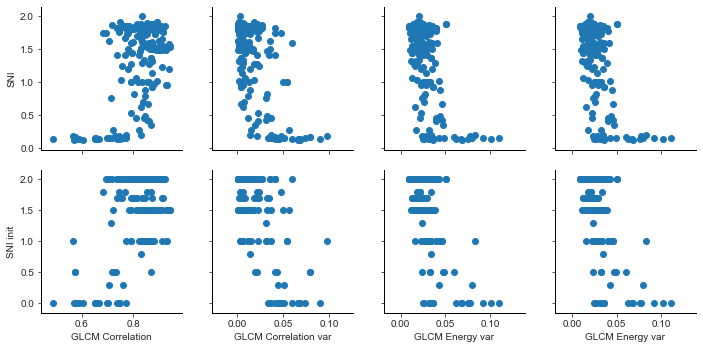

In [474]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(
    df[dfselector], y_vars=[
        *best_annotations
    ], 
    x_vars=[
        *best_features
    ])
ax = g.map(plt.scatter);
ax
# uu = ax.spines["top"].set_visible(True)
# uu = ax.spines["right"].set_visible(True)
# g.axes[0][0].ax.spines["top"].set_visible(True)
plt.savefig(output_path_images / "SNI_features.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "SNI_features.png", bbox_inches='tight', dpi=800)

# Micant paper

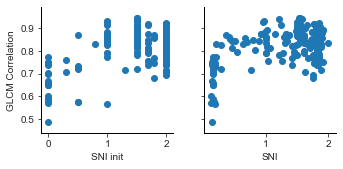

In [475]:
# iris = sns.load_dataset("iris")
# df["SNI init"] = df["SNI init"]
g = sns.PairGrid(
    df[dfselector], y_vars=[
        "GLCM Correlation"
#         *best_annotations
    ], 
    x_vars=[
        "SNI init", "SNI"
    ])
ax = g.map(plt.scatter);
ax
# uu = ax.spines["top"].set_visible(True)
# uu = ax.spines["right"].set_visible(True)
# g.axes[0][0].ax.spines["top"].set_visible(True)
plt.savefig(output_path_images / "SNI_features_corr_micrant.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "SNI_features_corr_micrant.png", bbox_inches='tight', dpi=800)
plt.savefig(output_path_images / "SNI_features_corr_micrant.eps", bbox_inches='tight', dpi=800)

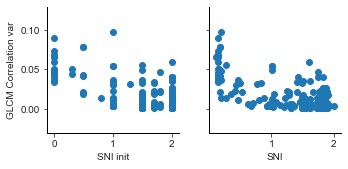

In [463]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(
    df[dfselector], y_vars=[
#         *best_annotations
        "GLCM Correlation var"
    ], 
    x_vars=[
        "SNI init", "SNI"
    ])
ax = g.map(plt.scatter);
ax
# uu = ax.spines["top"].set_visible(True)
# uu = ax.spines["right"].set_visible(True)
# g.axes[0][0].ax.spines["top"].set_visible(True)
plt.savefig(output_path_images / "SNI_features_corr_var_micrant.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "SNI_features_corr_var_micrant.png", bbox_inches='tight', dpi=800)
plt.savefig(output_path_images / "SNI_features_corr_var_micrant.eps", bbox_inches='tight', dpi=800)

In [437]:
dir(g.axes[0][0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

In [438]:
df[["Branch number", "GLCM Energy", "GLCM Homogenity", "GLCM Correlation"]].corrwith(df[["Skeleton length", "PFCVI", "SNI", "SWP", "Sum Semi-q"]])

Branch number      NaN
GLCM Correlation   NaN
GLCM Energy        NaN
GLCM Homogenity    NaN
PFCVI              NaN
SNI                NaN
SWP                NaN
Skeleton length    NaN
Sum Semi-q         NaN
dtype: float64

# Regression

## Feature selection


In [486]:
from sklearn.model_selection import train_test_split
from typing import List

from sklearn.linear_model import LinearRegression
import sklearn

In [510]:
# features = all features

X = df[dfselector][features].values
y = df[dfselector]["SNI"].values

def train_and_measure_error(features:List[str], fn_prefix=None):
    train_and_measure_error_for_colname(features, colname="SNI init",fn_prefix=fn_prefix)
    return train_and_measure_error_for_colname(features, colname="SNI",fn_prefix=fn_prefix)
    
def train_and_measure_error_for_colname(features:List[str], colname, fn_prefix=None):
    """
    colname = SNI
    """
    
    print(f"training {colname} with features={features}")
    dff = df[dfselector][features].copy()
    X = dff.values
    y = df[dfselector][colname].copy().values

    print(f"X.shape={X.shape}, yshape={y.shape}")

    # split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    reg = LinearRegression().fit(X_train, y_train)
    print(f"coef={reg.coef_}, intercept={reg.intercept_}")
#     print("predict")
    # display(reg.predict([X[:,5]]))
    # y[5]
    y_test_predict = reg.predict(X_test)
    print(f"Score={reg.score(X_test, y_test)}")
    print(f"mean X_train={np.mean(X_train, 0)}")
    mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predict)
    print(f"Mean Absolute Error={mae}")
    y_predict = reg.predict(X)
    dfs = df[dfselector].copy()
#     dfs["SNI prediction err"] = None
    dfs[f"Prediction"] = y_predict
    dfs[f"Predict err"] = np.abs(y - y_predict)
    
    wax = sns.lmplot(data=dfs, x=colname, y="Prediction", fit_reg=False)
    ax = wax.ax
    uu = ax.spines["top"].set_visible(True)
    uu = ax.spines["right"].set_visible(True)
    if fn_prefix is not None:
        plt.savefig(output_path_images / f"{fn_prefix}_{colname}_prediction.pdf", bbox_inches='tight')
        plt.savefig(output_path_images / f"{fn_prefix}_{colname}_prediction.png", bbox_inches='tight', dpi=800)
        plt.savefig(output_path_images / f"{fn_prefix}_{colname}_prediction.eps", bbox_inches='tight', dpi=800)
    
    
    
    display(dfs[dfselector][[f"Predict err", f"Prediction", "Annotation ID", "File Name", "SNI", "SNI init", "Annotation Color", "Annotation Details"]].sort_values(by=f"Predict err", ascending=False)[:5])
    return reg, X_train, X_test, y_train, y_test, mae

## All features


training SNI init with features=['Branch number', 'Skeleton length', 'Dead ends number', 'Branch number norm', 'Skeleton length norm', 'Dead ends number norm', 'Relative branch number', 'Relative skeleton length', 'Relative dead ends number', 'GLCM Correlation', 'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50', 'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var', 'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50', 'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var', 'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25', 'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90', 'GLCM Homogenity var', 'Lobulus Boundary Compactness']
X.shape=(293, 31), yshape=(293,)
coef=[ 1.77147656e-05 -9.50950827e-03  7.40011949e-05 -4.01117119e-04
  1.83364589e-01  1.95876339e-03  7.18806060e-05 -2.97685134e-02
 -3.64666502e-04  8.98405542e+00  8.54528232e-01  6.76432956e-01
 -2.09894508e+00 -7.48376090e+00  5.990762

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Predict err,Prediction,Annotation ID,File Name,SNI,SNI init,Annotation Color,Annotation Details
105,0.979161,1.020839,5,PIG-003_J-18-0165_HE.ndpi,1.017474,2.0,#00FF00,PFCVI=2 SNI=2 SWP=1 CMP=0.8
61,0.827650,0.827650,3,PIG-001_J-17-0571_LM central_HE.ndpi,0.141499,0.0,#0000FF,SNI=0.0 CMP=0.8
108,0.691125,1.691125,1,PIG-003_J-18-0165_HE.ndpi,1.141705,1.0,#0000FF,SNI=1.0 CMP=0.7
74,0.677333,1.677333,6,PIG-002_J-18-0091_HE.ndpi,0.627246,1.0,#0000FF,SNI=1.0 SQZ=0.3
273,0.647295,1.352705,4,PIG-004_BBJ-004-3 _HE_parenchyme.ndpi,1.500528,2.0,#0000FF,IFE=1 CVM=0 SQZ=0.3 SNI=2


training SNI with features=['Branch number', 'Skeleton length', 'Dead ends number', 'Branch number norm', 'Skeleton length norm', 'Dead ends number norm', 'Relative branch number', 'Relative skeleton length', 'Relative dead ends number', 'GLCM Correlation', 'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50', 'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var', 'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50', 'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var', 'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25', 'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90', 'GLCM Homogenity var', 'Lobulus Boundary Compactness']
X.shape=(293, 31), yshape=(293,)
coef=[ 4.24758492e-05 -1.46246066e-02 -2.91723883e-05 -7.40001920e-04
  2.99659368e-01  2.65441175e-03  6.20553888e-05 -2.57106472e-02
 -3.42746060e-04  1.63518407e+01  1.26942598e-01 -1.66579783e+00
 -5.75220532e+00 -6.13474332e+00 -2.28716039e+0

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Predict err,Prediction,Annotation ID,File Name,SNI,SNI init,Annotation Color,Annotation Details
312,0.887597,0.863498,6,PIG-005_J-18-0633_HE_PRML per decell.ndpi,1.751095,1.8,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=1.8
315,0.782204,1.058048,9,PIG-005_J-18-0633_HE_PRML per decell.ndpi,0.275843,1.5,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=1.5
61,0.759409,0.900908,3,PIG-001_J-17-0571_LM central_HE.ndpi,0.141499,0.0,#0000FF,SNI=0.0 CMP=0.8
71,0.750240,1.450687,0,PIG-002_J-18-0091_HE.ndpi,0.700447,1.5,#0000FF,SNI=1.5 SQZ=0.2
74,0.722604,1.349850,6,PIG-002_J-18-0091_HE.ndpi,0.627246,1.0,#0000FF,SNI=1.0 SQZ=0.3


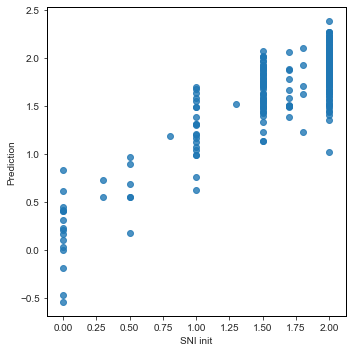

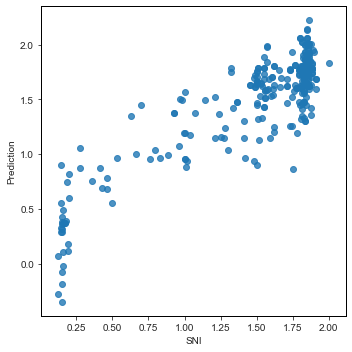

In [488]:
reg, X_train, X_test, y_train, y_test, mae = train_and_measure_error(features)

In [489]:
# dff = df[dfselector][features]
# X = dff.values
# y = df[dfselector]["SNI"].values

# display(X.shape)
# display(y.shape)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## Manual feature selection


Select the same features as without MicrAnt. It make sense that it does not work so well.

training SNI init with features=['GLCM Correlation', 'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50', 'GLCM Correlation p90', 'GLCM Correlation var']
X.shape=(293, 6), yshape=(293,)
coef=[ 1.58434346  0.78693382  2.46044955 -2.11051473 -4.84755321 -1.72259921], intercept=4.048561877093696
Score=0.40657503651399346
mean X_train=[0.83548805 0.7383461  0.80594197 0.8550823  0.92006862 0.01324026]
Mean Absolute Error=0.2746486382181916


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Predict err,Prediction,Annotation ID,File Name,SNI,SNI init,Annotation Color,Annotation Details
314,1.464892,-0.464892,8,PIG-005_J-18-0633_HE_PRML per decell.ndpi,0.192919,1.0,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=1.0
111,1.252783,1.752783,9,PIG-003_J-18-0165_HE.ndpi,0.355747,0.5,#0000FF,SNI=0.5 SQZ=0.5 IFE=0 CVM=0
165,1.012000,0.988000,10,PIG-008_P008 LL-C_HE_parenchyme centr..ndpi,1.601382,2.0,#0000FF,IFE=0 CVM=0 SNI=2 SQZ=0.5
45,1.000445,1.000445,1,PIG-001_J-17-0571_LM central_HE.ndpi,0.141663,0.0,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9
64,0.968528,1.468528,7,PIG-001_J-17-0571_LM central_HE.ndpi,0.182274,0.5,#0000FF,SNI=0.5 CMP=0.7


training SNI with features=['GLCM Correlation', 'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50', 'GLCM Correlation p90', 'GLCM Correlation var']
X.shape=(293, 6), yshape=(293,)
coef=[ 9.19920788  0.08403445  0.14885575 -5.5542876  -4.97858414 -2.39683633], intercept=2.966313391109996
Score=0.3540401385011779
mean X_train=[0.83548805 0.7383461  0.80594197 0.8550823  0.92006862 0.01324026]
Mean Absolute Error=0.2649025212825334


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Predict err,Prediction,Annotation ID,File Name,SNI,SNI init,Annotation Color,Annotation Details
76,1.264079,1.462758,8,PIG-002_J-18-0091_HE.ndpi,0.198679,0.8,#0000FF,SNI=0.8 SQZ=0.2 CVM=1
72,1.124459,1.401414,1,PIG-002_J-18-0091_HE.ndpi,0.276956,1.0,#0000FF,SNI=1.0 CMP=0.5
111,1.100093,1.455840,9,PIG-003_J-18-0165_HE.ndpi,0.355747,0.5,#0000FF,SNI=0.5 SQZ=0.5 IFE=0 CVM=0
78,1.070438,1.533072,11,PIG-002_J-18-0091_HE.ndpi,0.462635,1.0,#0000FF,SNI=1.0 CMP=0.5
104,1.044000,1.710692,3,PIG-003_J-18-0165_HE.ndpi,0.666692,1.0,#00FF00,PFCVI=2 SNI=1 SWP=1 CMP=0.6


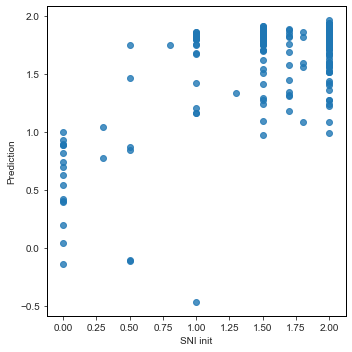

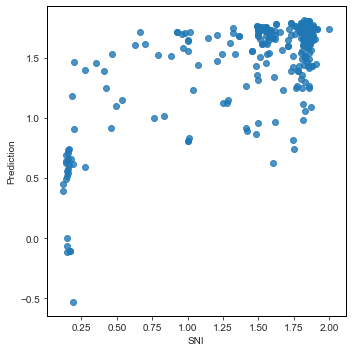

In [490]:
reg_bf, X_train_bf, X_test_bf, y_train_bf, y_test_bf, mae_bf = train_and_measure_error(best_features)

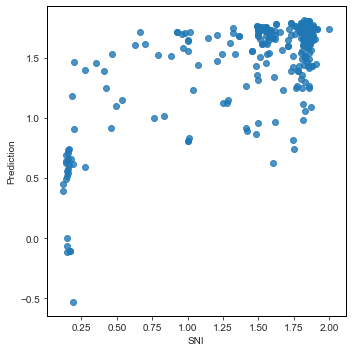

In [491]:
# Xtr = sfm.transform(X) # from automat
Xtr = df[dfselector][best_features].values
clf=reg_bf


dfs = df[dfselector].copy()
dfs["Prediction"] = clf.predict(Xtr)
wax = sns.lmplot(data=dfs, x="SNI", y="Prediction", fit_reg=False)
ax = wax.ax
uu = ax.spines["top"].set_visible(True)
uu = ax.spines["right"].set_visible(True)
plt.savefig(output_path_images / "SNI_prediction.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "SNI_prediction.png", bbox_inches='tight', dpi=800)

In [492]:
## Try automatic selection

In [493]:
# from sklearn.linear_model import LinearRegression
# import sklearn
# reg = LinearRegression().fit(X_train, y_train)
# display("Score")
# display(reg.score(X_test, y_test))
# display(reg.coef_)

# display(reg.intercept_)
# print("predict")
# # display(reg.predict([X[:,5]]))
# # y[5]
# y_test_predict = reg.predict(X_test)
# sklearn.metrics.mean_absolute_error(y_test, y_test_predict)

In [494]:
# sl = [5,10,15]
# display(X[sl, :])
# display(y[sl])
# display(reg.predict(X[sl,:]))

## Try automatic selection

In [495]:
from sklearn.feature_selection import f_regression, mutual_info_regression
mutual_info_regression(X_train, y_train)

array([0.09883968, 0.13459135, 0.16291348, 0.14868606, 0.18006216,
       0.1476201 , 0.30512865, 0.36830717, 0.17787284, 0.39354854,
       0.48831163, 0.31460674, 0.25177859, 0.32135724, 0.25932346,
       0.33836668, 0.29022977, 0.32432179, 0.21341689, 0.30343286,
       0.33159297, 0.47768576, 0.39326924, 0.25391033, 0.23521327,
       0.33712452, 0.41590538, 0.40423681, 0.44566846, 0.29214717,
       0.15012311])

In [496]:
# import sklearn
# sklearn.

In [497]:
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
# dff = df[dfselector][features]
# Xf = dff.values




# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
# clf = LassoCV(cv=5)
# clf = LassoCV()
# clf = LinearSVC()
clf = LinearRegression()


# Set a minimum threshold of 0.25
# sfm = SelectFromModel(clf)# , max_features=3)#, threshold=0.1)
sfm = SelectFromModel(clf, max_features=3)#, threshold=0.1)
sfm.fit(X_train, y_train)
display(sfm.get_support())
Xtr_train = sfm.transform(X_train)
Xtr_test = sfm.transform(X_test)
display(Xtr_test.shape)

clf.fit(Xtr_train, y_train)
display("score")
display(clf.score(Xtr_test, y_test))
display(clf.score)



array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False])

(59, 3)

'score'

0.5230919864394161

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

### Selected features

In [498]:
auto_features = np.asarray(features)[sfm.get_support()]
auto_features

array(['GLCM Correlation', 'GLCM Energy var', 'GLCM Homogenity var'],
      dtype='<U28')

In [499]:
sfm.estimator_.coef_

array([ 4.24758492e-05, -1.46246066e-02, -2.91723883e-05, -7.40001920e-04,
        2.99659368e-01,  2.65441175e-03,  6.20553888e-05, -2.57106472e-02,
       -3.42746060e-04,  1.63518407e+01,  1.26942598e-01, -1.66579783e+00,
       -5.75220532e+00, -6.13474332e+00, -2.28716039e+00,  1.55423474e+01,
        6.86186837e+00, -1.05147935e+01,  8.65676261e-01, -6.88678817e-01,
       -1.82522757e+00,  6.21011869e+00, -7.97948532e+01,  5.02713488e+00,
        1.07996842e+01, -5.06550357e+00, -6.98981730e-01, -6.51490049e-01,
       -1.54123960e+01,  1.36843626e+02, -1.66234286e+00])

### Error

In [500]:

y_test_predict = clf.predict(Xtr_test)
sklearn.metrics.mean_absolute_error(y_test, y_test_predict)

0.2402426526319052

training SNI init with features=['GLCM Correlation' 'GLCM Energy var' 'GLCM Homogenity var']
X.shape=(293, 3), yshape=(293,)
coef=[  3.50698671 -47.13547777  56.70826724], intercept=-0.5514094089608876
Score=0.4065025622978659
mean X_train=[0.83548805 0.02605204 0.0087828 ]
Mean Absolute Error=0.26384376760305833


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Predict err,Prediction,Annotation ID,File Name,SNI,SNI init,Annotation Color,Annotation Details
39,1.118775,1.118775,3,PIG-001_J-17-0569_LM_HE.ndpi,0.152424,0.0,#0000FF,PFCVI=1 SNI=0.0 SWP=0 CMP=0.8
74,0.994650,1.994650,6,PIG-002_J-18-0091_HE.ndpi,0.627246,1.0,#0000FF,SNI=1.0 SQZ=0.3
105,0.904076,1.095924,5,PIG-003_J-18-0165_HE.ndpi,1.017474,2.0,#00FF00,PFCVI=2 SNI=2 SWP=1 CMP=0.8
66,0.868881,0.868881,11,PIG-001_J-17-0571_LM central_HE.ndpi,0.143894,0.0,#0000FF,SNI=0.0 CMP=0.9
49,0.844313,0.844313,10,PIG-001_J-17-0571_LM central_HE.ndpi,0.150332,0.0,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9


training SNI with features=['GLCM Correlation' 'GLCM Energy var' 'GLCM Homogenity var']
X.shape=(293, 3), yshape=(293,)
coef=[  3.7919436  -46.37151762  62.24110073], intercept=-1.0342914673578876
Score=0.523091986439415
mean X_train=[0.83548805 0.02605204 0.0087828 ]
Mean Absolute Error=0.24024265263190572


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Predict err,Prediction,Annotation ID,File Name,SNI,SNI init,Annotation Color,Annotation Details
74,1.171872,1.799119,6,PIG-002_J-18-0091_HE.ndpi,0.627246,1.0,#0000FF,SNI=1.0 SQZ=0.3
64,0.903517,1.085791,7,PIG-001_J-17-0571_LM central_HE.ndpi,0.182274,0.5,#0000FF,SNI=0.5 CMP=0.7
315,0.877696,1.153539,9,PIG-005_J-18-0633_HE_PRML per decell.ndpi,0.275843,1.5,#0000FF,IFE=0 CVM=0 SQZ=0.2 SNI=1.5
244,0.839287,2.159287,11,PIG-012_Pilsen_HE_LLC.ndpi,1.320000,2.0,#0000FF,SNI=2.0 SQZ=0.2 IFE=0.0
72,0.818717,1.095672,1,PIG-002_J-18-0091_HE.ndpi,0.276956,1.0,#0000FF,SNI=1.0 CMP=0.5


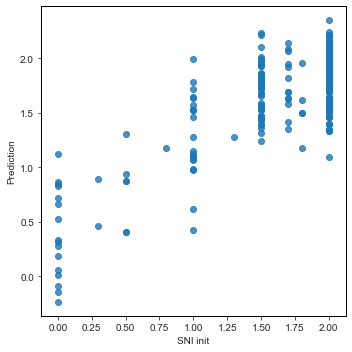

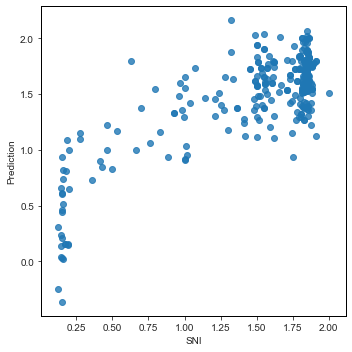

In [511]:
reg, X_train, X_test, y_train, y_test, mae = train_and_measure_error(auto_features, fn_prefix="features")

# Prediction example

array([[0.87302225, 0.03586075, 0.01153731],
       [0.77373934, 0.0827845 , 0.04155   ],
       [0.83159913, 0.03434028, 0.00754758]])

array([0.92761713, 0.1967814 , 0.19867925])

array([1.33133718, 0.64695966, 0.99644418])

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 216x216 with 0 Axes>

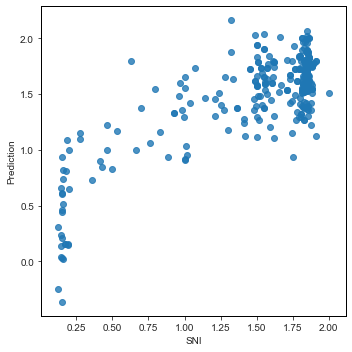

In [518]:
sl = [5,10,50]
Xtr = sfm.transform(X) # from automat
# Xtr = df[dfselector][best_features].values
display(Xtr[sl, :])
display(y[sl])
display(clf.predict(Xtr[sl,:]))
dfs = df[dfselector]
dfs["Prediction"] = clf.predict(Xtr)
plt.figure(figsize=[3,3])
wax = sns.lmplot(data=dfs, x="SNI", y="Prediction", fit_reg=False)
ax = wax.ax
uu = ax.spines["top"].set_visible(True)
uu = ax.spines["right"].set_visible(True)
plt.savefig(output_path_images / "SNI_prediction.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "SNI_prediction.png", bbox_inches='tight', dpi=800)

In [503]:
# dfs["Prediction"] = reg.predict(X)

In [504]:
# list(dfs.keys())

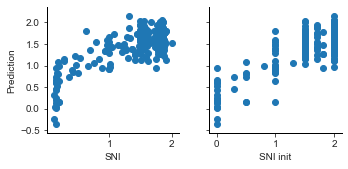

In [505]:

g = sns.PairGrid(
    dfs, y_vars=[
#         *best_features
        "Prediction"
    ], 
    x_vars=[
#         *best_annotations
        "SNI", "SNI init"
    ])
g.map(plt.scatter);

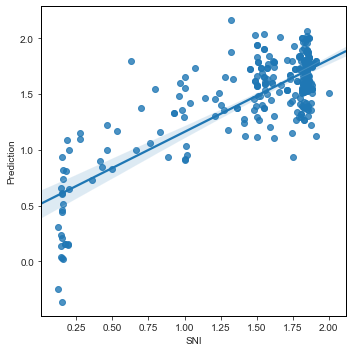

In [506]:
# sns.set_style("white")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
# with sns.axes_style("ticks"):

#     sns.despine()
wax = sns.lmplot(data=dfs, x="SNI", y="Prediction")
ax = wax.ax
uu = ax.spines["top"].set_visible(True)
uu = ax.spines["right"].set_visible(True)
# ax.axes.set_axis_on()
# ax.axes.spi
# uu.set_visible(True)
# dir(uu)

In [507]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.for

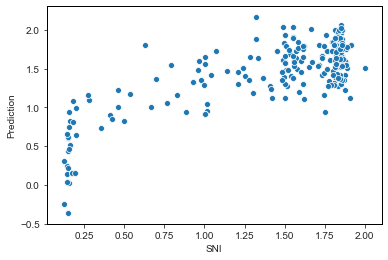

In [508]:
# sns.despine()
sns.scatterplot(data=dfs, x="SNI", y="Prediction")
